# **Project Name**    -  SCMS delivery history analysis



##### **Project Type**    - EDA on Supply Chain Management Dataset
##### **Contribution**    - Individual

# **Project Summary -**


This dataset contains detailed information about shipment orders, shipment modes, weights, freight costs, managing teams, vendors, vendor INCO terms, scheduled delivery dates, delivered dates, and processing time information.

The initial step in data analysis begins with **data cleaning and preprocessing** to ensure consistency, accuracy, and usability of the dataset. The most critical steps include:

- Handling missing values  
- Converting date-time and numerical columns to appropriate data types  
- Creating derived features such as delivery status  
- Handling referenced values and outliers  

Outliers and referenced values can significantly distort visualizations and insights. For example:

- Null values are present in the **Shipment Mode** column  
- Referenced values are present in **Freight Cost** and **Weight** columns  

These values are referenced because freight cost and weight are calculated once per shipment rather than per line item.

---

## Exploratory Data Analysis (EDA)

EDA was performed to:

- Measure correlations between numerical variables  
- Identify cost-driving factors  
- Analyze delivery efficiency  
- Examine delivery timeliness patterns  

---

## Key Business Insights

### 1. Which numerical features depend heavily on each other?

The analysis revealed:

- **Weight, Line Item Value, and Insurance** are strongly correlated  
- Higher weight and higher item value lead to higher insurance costs  
- Freight cost has only a weak positive correlation with weight  

This indicates that additional factors beyond weight influence total freight cost.

---

### 2. Are shipments managed by specific teams more likely to be delivered on time?

- Most shipments are managed by the **PMO-US** team  
- On-time delivery rate: **88.5%**  
- Average delay: **-6.1 days**

A negative delay means shipments are delivered approximately **6 days earlier** than scheduled on average.

---

### 3. Does shipment mode influence meeting the scheduled delivery date?

Four shipment modes were analyzed (excluding null values).  

| Shipment Mode | On-time % | Average Delay |
|---------------|----------|--------------|
| Air           | 90%      | -3           |
| Air Charter   | 88%      | -19          |
| Truck         | 83%      | -9           |
| Ocean         | 82%      | 5            |

Key observations:

- **Air shipments** have the highest on-time rate (90%)
- **Air Charter** has the lowest average delay but higher freight cost
- **Ocean shipments** show the highest positive delay (late deliveries)

---

### 4. Do shipments from certain countries experience more delays?

Countries such as:

- Congo DRC  
- Kenya  

show greater delivery delays compared to others with significant shipment volume.  

However, countries with fewer orders may also show large delays due to limited sample size.

---

### 5. Does shipment mode impact the frequency of on-time deliveries?

- Overall on-time delivery rate: **88%**
- A small number of shipments experience severe delays (>90 days)
- Air shipments demonstrate the highest reliability in on-time performance

---

### 6. Does lead time (PO Sent → Scheduled Delivery) affect delivery performance?

Limitations:

- Many null values in **PO Sent to Vendor Date**
- Shipments originating from RDC do not follow standard PO flow

After excluding invalid entries and creating a **Lead Time** feature:

- Shorter lead times increase the risk of delivery delays  
- Adequate lead time improves the probability of on-time delivery  

---

### 7. Does INCO term impact vendor delivery performance?

Three major INCO terms were analyzed:

| INCO Term | On Time Rate | Average Delay |
|-----------|-------------|--------------|
| EXW       | 95%         | 0            |
| DDP       | 92%         | -12          |
| RDC       | 82%         | -8           |

Insights:

- **EXW** has the highest on-time rate  
- **DDP** shipments are frequently delivered early  
- **RDC** shipments show comparatively lower reliability  

---

### 8. Are higher weight shipments more likely to incur higher insurance costs?

Yes. There is a **moderately high positive correlation** between:

- Shipment weight  
- Line item insurance  

But factors other than weight, such as line item value and line item quantity, strongly influence the cost of insurance.

---

# Conclusion

The overall delivery performance is strong with an 88% on-time rate. Air shipments and EXW INCO terms show superior reliability, while shorter lead times and certain geographic regions contribute to increased delays. Cost drivers such as weight and item value significantly influence insurance expenses, but freight cost is impacted by multiple additional operational factors.


# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


On-time delivery and supply cost management are critical to the success of supply chain operations, particularly for emergency supplies and cost-sensitive delivery locations.

This project focuses on performing **Exploratory Data Analysis (EDA)** on a supply chain and delivery dataset to understand the key factors that influence:

- Delivery performance  
- Shipment costs  
- Overall operational efficiency  

The primary objective of this analysis is to derive meaningful and actionable insights that support data-driven decision-making. These insights aim to improve:

- Strategic planning  
- Cost efficiency  
- Delivery reliability  

Ultimately, the analysis helps stakeholders make calculated decisions to optimize supply chain performance and ensure dependable delivery outcomes.


#### **Define Your Business Objective?**

To reduce delivery delay and manage cost effeciently

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# Load Dataset
df = pd.read_csv('/Users/kushal/Desktop/python_programs/SCMS_Delivery_History_Dataset.csv')

### Dataset First View

In [3]:
# Dataset First Look
df.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


In [4]:
df.tail()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
10319,86818,103-ZW-T30,FPQ-15197,SO-50020,DN-4307,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,166571,599655.60,3.60,0.06,"Mylan, H-12 & H-13, India",No,See DN-4307 (ID#:83920),See DN-4307 (ID#:83920),705.79
10320,86819,104-CI-T30,FPQ-15259,SO-50102,DN-4313,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,...,60,21072,137389.44,6.52,0.11,Hetero Unit III Hyderabad IN,No,See DN-4313 (ID#:83921),See DN-4313 (ID#:83921),161.71
10321,86821,110-ZM-T30,FPQ-14784,SO-49600,DN-4316,Zambia,PMO - US,From RDC,N/A - From RDC,Truck,...,30,514526,5140114.74,9.99,0.33,Cipla Ltd A-42 MIDC Mahar. IN,No,Weight Captured Separately,Freight Included in Commodity Cost,5284.04
10322,86822,200-ZW-T30,FPQ-16523,SO-51680,DN-4334,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,17465,113871.80,6.52,0.11,Mylan (formerly Matrix) Nashik,Yes,1392,Freight Included in Commodity Cost,134.03
10323,86823,103-ZW-T30,FPQ-15197,SO-50022,DN-4336,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,36639,72911.61,1.99,0.03,"Cipla, Goa, India",No,Weight Captured Separately,Freight Included in Commodity Cost,85.82


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
print("Number of rows and columns in the dataset:", df.shape)

Number of rows and columns in the dataset: (10324, 33)


### Dataset Information

In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
df.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [8]:
#define date columns
date_cols = [
    "PQ First Sent to Client Date",
    "PO Sent to Vendor Date",
    "Scheduled Delivery Date",
    "Delivered to Client Date",
    "Delivery Recorded Date"
]

In [9]:
#replace date not captured with nan
df[date_cols] = df[date_cols].replace("Date Not Captured", np.nan)

In [10]:
missing_summary = (
    df.isna()
      .mean()
      .mul(100)
      .sort_values(ascending=False)
      .reset_index()
      .rename(columns={"index": "column", 0: "missing_pct"})
)

missing_summary


,column,missing_pct
0,Dosage,16.815188
1,Shipment Mode,3.487021
2,PO Sent to Vendor Date,3.177063
3,Line Item Insurance (USD),2.779930
4,PQ First Sent to Client Date,1.985664
5,First Line Designation,0.000000
6,Manufacturing Site,0.000000
7,Unit Price,0.000000
8,Pack Price,0.000000
9,Line Item Value,0.000000


In [11]:
# Missing Values/Null Values Count
df.isnull().sum()

ID                                 0
Project Code                       0
PQ #                               0
PO / SO #                          0
ASN/DN #                           0
Country                            0
Managed By                         0
Fulfill Via                        0
Vendor INCO Term                   0
Shipment Mode                    360
PQ First Sent to Client Date     205
PO Sent to Vendor Date           328
Scheduled Delivery Date            0
Delivered to Client Date           0
Delivery Recorded Date             0
Product Group                      0
Sub Classification                 0
Vendor                             0
Item Description                   0
Molecule/Test Type                 0
Brand                              0
Dosage                          1736
Dosage Form                        0
Unit of Measure (Per Pack)         0
Line Item Quantity                 0
Line Item Value                    0
Pack Price                         0
U

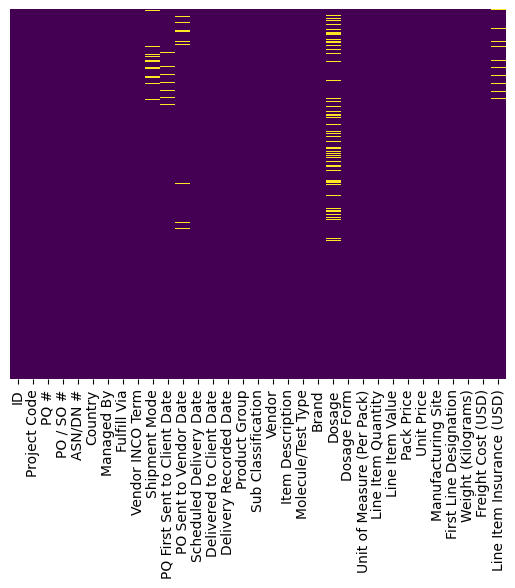

In [12]:
# Visualizing the missing values
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.show()

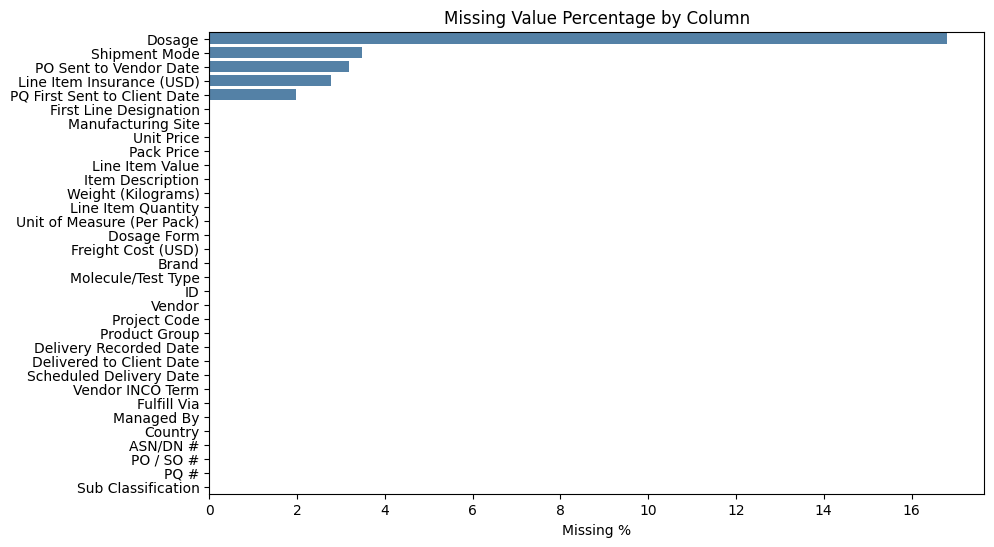

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=missing_summary,
    y="column",
    x="missing_pct",
    color="steelblue"
)
plt.title("Missing Value Percentage by Column")
plt.xlabel("Missing %")
plt.ylabel("")
plt.show()


### What did you know about your dataset?

The dataset captures operational, financial, logistical, and product-level details of supply chain shipments. It enables analysis of delivery performance, cost drivers, vendor efficiency, and transportation effectiveness.

## ***2. Understanding Your Variables***

In [14]:
# Dataset Columns
df.columns

Index(['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)'],
      dtype='object')

In [15]:
# Dataset Describe
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,10324.0,NaN,NaN,NaN,51098.968229,31944.332496,1.0,12795.75,57540.5,83648.25,86823.0
Project Code,10324,142,116-ZA-T30,768,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PQ #,10324,1237,Pre-PQ Process,2681,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PO / SO #,10324,6233,SCMS-199289,67,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ASN/DN #,10324,7030,ASN-19166,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,10324,43,South Africa,1406,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Managed By,10324,4,PMO - US,10265,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fulfill Via,10324,2,From RDC,5404,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vendor INCO Term,10324,8,N/A - From RDC,5404,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Shipment Mode,9964,4,Air,6113,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Variable Description – SCMS Delivery History Dataset

Below is a detailed description of each column in the dataset:

---

### Identification & Reference Columns

- **ID**  
  Unique identifier for each shipment line item record.

- **Project Code**  
  Code representing the specific project under which the shipment was made.

- **PQ # (Procurement Quote Number)**  
  Unique number assigned during the procurement quotation process.

- **PO / SO # (Purchase Order / Sales Order Number)**  
  Unique identifier for the purchase or sales order associated with the shipment.

- **ASN/DN # (Advanced Shipment Notice / Delivery Note Number)**  
  Reference number used for shipment tracking and delivery confirmation.

---

### Geographic & Management Information

- **Country**  
  Destination country where the shipment is delivered.

- **Managed By**  
  Team or department responsible for managing the shipment.

- **Fulfill Via**  
  Indicates the fulfillment channel (e.g., vendor direct shipment or regional distribution center).

- **Vendor INCO Term**  
  International Commercial Terms (e.g., EXW, DDP, RDC) defining responsibilities between buyer and seller.

- **Shipment Mode**  
  Mode of transportation used for delivery (Air, Ocean, Truck, etc.).

---

### Date & Timeline Columns

- **PQ First Sent to Client Date**  
  Date when the procurement quotation was first shared with the client.

- **PO Sent to Vendor Date**  
  Date when the purchase order was officially sent to the vendor.

- **Scheduled Delivery Date**  
  Planned delivery date agreed upon for shipment arrival.

- **Delivered to Client Date**  
  Actual date the shipment was delivered to the client.

- **Delivery Recorded Date**  
  Date when the delivery was officially recorded in the system.

---

### Product Information

- **Product Group**  
  Broad category of the product (e.g., pharmaceuticals, medical supplies).

- **Sub Classification**  
  More specific classification within the product group.

- **Vendor**  
  Name of the supplier providing the product.

- **Item Description**  
  Detailed description of the product being shipped.

- **Molecule / Test Type**  
  Active pharmaceutical ingredient (for medicines) or test type (for diagnostics).

- **Brand**  
  Brand name of the product.

- **Dosage**  
  Strength or concentration of the pharmaceutical product.

- **Dosage Form**  
  Physical form of the medication (tablet, capsule, liquid, etc.).

- **Unit of Measure (Per Pack)**  
  Measurement unit representing the quantity contained in one pack (e.g., 100 tablets per pack).

---

### Financial & Quantity Information

- **Line Item Quantity**  
  Total quantity of items ordered for that specific line entry.

- **Line Item Value**  
  Total monetary value of the line item (Quantity × Unit Price).

- **Pack Price**  
  Price of one pack of the product.

- **Unit Price**  
  Cost per individual unit within a pack.

- **Line Item Insurance (USD)**  
  Insurance cost associated with the shipment of that line item.

- **Freight Cost (USD)**  
  Transportation cost incurred for delivering the shipment.

---

### Operational Details

- **Manufacturing Site**  
  Location where the product was manufactured.

- **First Line Designation**  
  Indicates whether the product is categorized as first-line treatment in healthcare supply classification.

- **Weight (Kilograms)**  
  Total shipment weight (in kg) corresponding to the line item.

### Check Unique Values for each variable.

In [16]:
# Check Unique Values for each variable.
df.nunique()

ID                              10324
Project Code                      142
PQ #                             1237
PO / SO #                        6233
ASN/DN #                         7030
Country                            43
Managed By                          4
Fulfill Via                         2
Vendor INCO Term                    8
Shipment Mode                       4
PQ First Sent to Client Date      764
PO Sent to Vendor Date            896
Scheduled Delivery Date          2006
Delivered to Client Date         2093
Delivery Recorded Date           2042
Product Group                       5
Sub Classification                  6
Vendor                             73
Item Description                  184
Molecule/Test Type                 86
Brand                              48
Dosage                             54
Dosage Form                        17
Unit of Measure (Per Pack)         31
Line Item Quantity               5065
Line Item Value                  8741
Pack Price  

## 3. ***Data Wrangling***

### Data Wrangling Code

In [17]:
# Write your code to make your dataset analysis ready.
df.rename(columns={"Freight Cost (USD)": "Freight_Cost_USD"}, inplace=True)


In [18]:
df.drop(['Item Description','Molecule/Test Type'],axis=1,inplace=True)

In [19]:
df['Freight_Cost_USD'].value_counts()

Freight_Cost_USD
Freight Included in Commodity Cost    1442
Invoiced Separately                    239
9736.1                                  36
6147.18                                 27
13398.06                                16
                                      ... 
749.36                                   1
7060.97                                  1
7616.19                                  1
12793.7                                  1
See DN-4282 (ID#:83919)                  1
Name: count, Length: 6733, dtype: int64

In [20]:
df['Weight (Kilograms)'].value_counts()

Weight (Kilograms)
Weight Captured Separately    1507
2                               29
6                               26
1                               23
60                              20
                              ... 
1727                             1
4038                             1
1930                             1
4382                             1
1392                             1
Name: count, Length: 4688, dtype: int64

In [21]:
#index of rows where freight cost is included in commodity cost or invoiced separately or referenced
freight_cost_indexes_to_remove = df.index[(df['Freight_Cost_USD'] == 'Freight Included in Commodity Cost') | (df['Freight_Cost_USD'] == 'Invoiced Separately') | (df['Freight_Cost_USD'].str.contains('[a-zA-Z]'))].tolist()
len(freight_cost_indexes_to_remove)

4126

In [22]:
#drop rows where freight cost is included in commodity cost or invoiced separately
clean_freight_cost_df = df.drop(index=freight_cost_indexes_to_remove)

In [23]:
print("No. of unique shipments:",len(clean_freight_cost_df['ASN/DN #'].unique()))

No. of unique shipments: 6198


In [24]:
clean_freight_cost_df['Freight_Cost_USD'] = clean_freight_cost_df['Freight_Cost_USD'].astype(float)
clean_freight_cost_df['Freight_Cost_USD'].describe()


count      6198.000000
mean      11103.234819
std       15813.026692
min           0.750000
25%        2131.120000
50%        5869.655000
75%       14406.570000
max      289653.200000
Name: Freight_Cost_USD, dtype: float64

In [25]:
clean_freight_cost_df = clean_freight_cost_df[clean_freight_cost_df['Weight (Kilograms)'] != 'Weight Captured Separately']
clean_freight_cost_df['Weight (Kilograms)'] = pd.to_numeric(clean_freight_cost_df['Weight (Kilograms)'], errors='coerce')
weight_anamoly_removed = clean_freight_cost_df[clean_freight_cost_df['Weight (Kilograms)'] < clean_freight_cost_df['Weight (Kilograms)'].quantile(0.99)]
weight_by_mode = weight_anamoly_removed.groupby('Shipment Mode')['Weight (Kilograms)'].sum().reset_index()

In [26]:
#now we calculate the freight cost per kg
weight_anamoly_removed['Freight_Cost_per_KG'] = weight_anamoly_removed['Freight_Cost_USD']/weight_anamoly_removed['Weight (Kilograms)']
cost_per_kg_anamoly = weight_anamoly_removed[weight_anamoly_removed['Freight_Cost_per_KG'] > weight_anamoly_removed['Freight_Cost_per_KG'].quantile(0.95)]
cost_per_kg_anamoly.sort_values(by='Freight_Cost_per_KG',ascending=False)['Freight_Cost_per_KG']

cost_per_kg_anamoly_removed = weight_anamoly_removed[weight_anamoly_removed['Freight_Cost_per_KG'] < weight_anamoly_removed['Freight_Cost_per_KG'].quantile(0.99)]


In [27]:
#convert date columns to datetime data type
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors="coerce")

#define new columns for analysis: delivery delay, processing time and po to schedule days
df["delivery_delay_days"] = (
    df["Delivered to Client Date"] - df["Scheduled Delivery Date"]
).dt.days

df["Processing_Time"] = (
    df["PO Sent to Vendor Date"] - df["PQ First Sent to Client Date"]
).dt.days
df['PO_to_Schedule_Days'] = (
    df['Scheduled Delivery Date'] - df['PO Sent to Vendor Date']
).dt.days
# On-time delivery flag
df['On_Time_Delivery'] = (
    df['Delivered to Client Date'] <= df['Scheduled Delivery Date']
)
#define monthly volume
df['YearMonth'] = df['Delivered to Client Date'].dt.to_period('M')
monthly_volume = df.groupby('YearMonth').size()


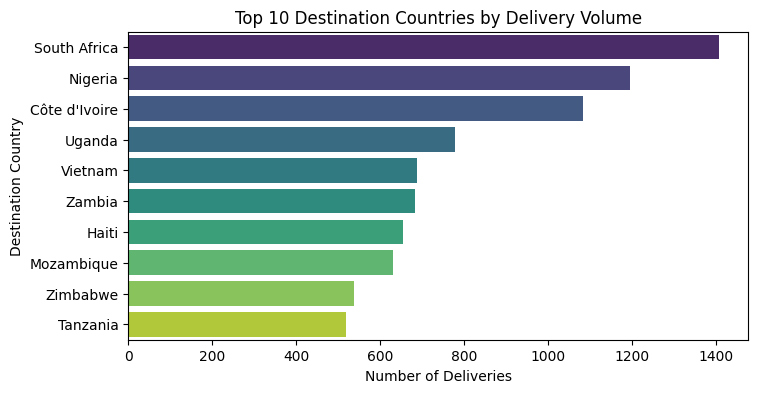

In [28]:
#sns plot for top 10 countries by delivery volume
top_countries = df['Country'].value_counts().nlargest(10).index
plt.figure(figsize=(8, 4))
sns.countplot(data=df[df['Country'].isin(top_countries)],
              y='Country',
              order=top_countries,
              palette='viridis')
plt.title("Top 10 Destination Countries by Delivery Volume")
plt.xlabel("Number of Deliveries")
plt.ylabel("Destination Country")
plt.show()

In [29]:
# Shipment mode distribution (by count)
shipment_mode = df['Shipment Mode'].value_counts()
labels1 = shipment_mode.index
sizes1 = (shipment_mode / shipment_mode.sum()) * 100

# Weight distribution by shipment mode
labels2 = weight_by_mode['Shipment Mode']
sizes2 = weight_by_mode['Weight (Kilograms)']

# Create subplot with 2 pie charts
fig = make_subplots(
    rows=1, cols=2,
    specs=[[{'type':'domain'}, {'type':'domain'}]],
    subplot_titles=[
        "Shipment Mode Distribution by Volume",
        "Weight Distribution by Shipment Mode"
    ]
)

# First pie (Volume %)
fig.add_trace(
    go.Pie(labels=labels1, values=sizes1, hole=0.4,
           textinfo='percent+label'),
    row=1, col=1
)

# Second pie (Weight %)
fig.add_trace(
    go.Pie(labels=labels2, values=sizes2, hole=0.4,
           textinfo='percent+label'),
    row=1, col=2
)

fig.update_layout(
    title_text="Shipment Mode Analysis: Volume vs Weight Distribution",
    template="plotly_white"
)

fig.show()


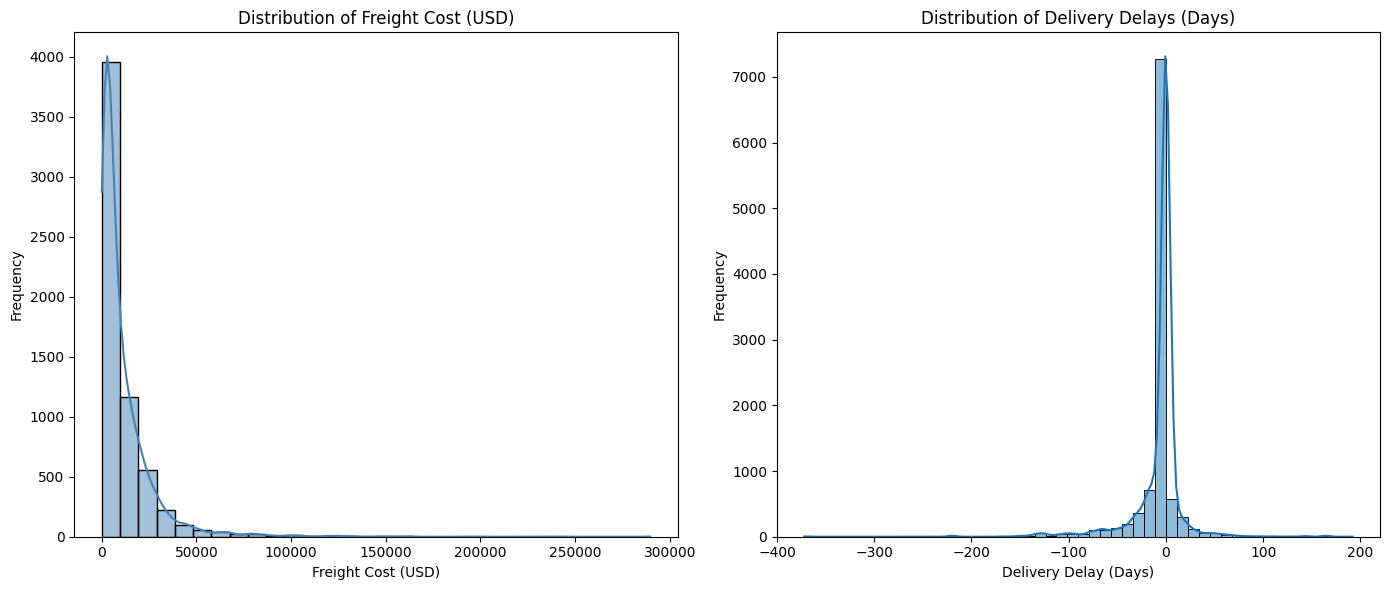

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Freight Cost Distribution
sns.histplot(clean_freight_cost_df['Freight_Cost_USD'].astype(float), bins=30, kde=True, color='steelblue', ax=axes[0])
axes[0].set_title("Distribution of Freight Cost (USD)")
axes[0].set_xlabel("Freight Cost (USD)")
axes[0].set_ylabel("Frequency")

# Delivery Delay Distribution
sns.histplot(df["delivery_delay_days"],bins=50, kde=True, ax=axes[1])
axes[1].set_title("Distribution of Delivery Delays (Days)")
axes[1].set_xlabel("Delivery Delay (Days)")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


In [31]:
fig_insurance = go.Figure()

fig_insurance.add_histogram(
    x=df['Line Item Insurance (USD)'].dropna(),
    nbinsx=30,
    opacity=0.75
)

fig_insurance.update_layout(
    title="Insurance Cost Distribution",
    xaxis_title="Insurance Cost (USD)",
    yaxis_title="Count",
    template="plotly_white"
)

fig_insurance.show()

#insights from insurance cost distribution analysis
# The insurance cost distribution is right-skewed, with a majority of shipments incurring lower insurance costs and a few shipments having significantly higher costs.
# This skewness suggests that while most shipments are low-risk or low-value, there are occasional high-value shipments that require substantial insurance coverage.
# The presence of outliers indicates that some shipments have exceptionally high insurance costs, which may be linked to high-value items or specific risk factors that should be analyzed further.


In [32]:
# Get unique shipment modes
shipment_modes = weight_by_mode['Shipment Mode'].unique()

# Create 2x2 subplots
fig = make_subplots(rows=2, cols=2, subplot_titles=[f'Shipment Mode: {mode}' for mode in shipment_modes])

# Add scatter plots to subplots
for idx, mode in enumerate(shipment_modes):
    # Calculate row and column (2x2 grid)
    row = (idx // 2) + 1
    col = (idx % 2) + 1
    
    # Filter data for current mode
    mode_data = weight_anamoly_removed[weight_anamoly_removed['Shipment Mode'] == mode]
    
    # Add scatter trace
    fig.add_trace(
        go.Scatter(x=mode_data['Weight (Kilograms)'],y=mode_data['Freight_Cost_USD'], mode='markers', name=mode, showlegend=False),
        row=row, col=col
    )
    
    z = np.polyfit(mode_data['Weight (Kilograms)'], mode_data['Freight_Cost_USD'], 1)
    p = np.poly1d(z)
    
    # Add trendline
    x_range = np.linspace(mode_data['Weight (Kilograms)'].min(), 
                            mode_data['Weight (Kilograms)'].max(), 100)
    
    fig.add_trace(
        go.Scatter(x=x_range, y=p(x_range), mode='lines', name=f'{mode} trend', line=dict(color='red', dash='dash'), showlegend=False),
        row=row, col=col
    )

# Update layout
fig.update_layout( title_text='Weight vs Freight Cost by Shipment Mode', height=800, width=1000, template='plotly_white', showlegend=False )

# Update axis labels
fig.update_xaxes(title_text='Weight (Kilograms)', row=2, col=1)
fig.update_xaxes(title_text='Weight (Kilograms)', row=2, col=2)
fig.update_yaxes(title_text='Freight Cost (USD)', row=1, col=1)
fig.update_yaxes(title_text='Freight Cost (USD)', row=2, col=1)

fig.show()

In [33]:
#boxplot for cost per kg
fig = px.box(cost_per_kg_anamoly_removed, y='Freight_Cost_per_KG')
fig.show()
#we see a lot of outliers in this plot which indicates freight cost per kg can vary significantly for different shipment modes, weight and urgency of the delivery.


In [34]:
# is_referenced flag for freight_cost column
df['isReferenced_freight'] = df['Freight_Cost_USD'].str.contains('[a-zA-Z]').astype(int)
df['isReferenced_freight'].sum()
# We are defining this column because the freight cost column has values like see asn-93 and freight included in commodity cost
# This is because the freight cost is charged only once per shipment and not per line item

np.int64(4126)

In [35]:
#is referenced flag for weight
#same explanation as above
df['isReferenced_weight'] = df['Weight (Kilograms)'].str.contains('[a-zA-Z]').astype(int)
df['isReferenced_weight'].sum()

np.int64(3952)

In [36]:
df['Freight_Cost_USD_Clean'] = df['Freight_Cost_USD'].where(
    df['isReferenced_freight'] != 1,
    0
)
df['Freight_Cost_USD_Clean'] = pd.to_numeric(df['Freight_Cost_USD_Clean'], errors='coerce')


In [37]:
# Cost structure analysis
# Total Cost = Line Item Value + Freight Cost + Line Item Insurance
# Cost Per Unit = Total Cost / Line Item Quantity
df['Total_Cost'] = df['Line Item Value'] + df['Freight_Cost_USD_Clean'].fillna(0) + df['Line Item Insurance (USD)'].fillna(0)
df['Cost_Per_Unit'] = df['Total_Cost'] / df['Line Item Quantity']

In [38]:
numeric_cols = [
    'Line Item Value',
    'Line Item Quantity',
    'Weight (Kilograms)',
    'Freight_Cost_USD_Clean',
    'Line Item Insurance (USD)',
    # 'delivery_delay_days',
    'Processing_Time',
    # 'Total_Cost',
    # 'Cost_Per_Unit'
]
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [39]:
# Create on-time delivery flag
df['On_Time'] = df['delivery_delay_days'] <= 0
df['Delayed'] = df['delivery_delay_days'] > 0

In [40]:
# Calculate lead time
df['Lead_Time_Days'] = (df['Scheduled Delivery Date'] - df['PO Sent to Vendor Date']).dt.days

In [41]:
# Categorize delay severity
bins = [-np.inf, 0, 7, 30, 90, np.inf]
labels = ['Early/On-Time', 'Minor Delay (1-7 days)', 'Moderate Delay (8-30 days)', 
                'Major Delay (31-90 days)', 'Severe Delay (>90 days)']
df['Delay_Category'] = pd.cut(df['delivery_delay_days'], bins=bins, labels=labels)

In [42]:
df['Managed By'].value_counts()

Managed By
PMO - US                     10265
South Africa Field Office       57
Haiti Field Office               1
Ethiopia Field Office            1
Name: count, dtype: int64

In [43]:
df['Managed By'].value_counts()

Managed By
PMO - US                     10265
South Africa Field Office       57
Haiti Field Office               1
Ethiopia Field Office            1
Name: count, dtype: int64

In [44]:
df['Vendor INCO Term'].value_counts()

Vendor INCO Term
N/A - From RDC    5404
EXW               2778
DDP               1443
FCA                397
CIP                275
DDU                 15
DAP                  9
CIF                  3
Name: count, dtype: int64

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [47]:
#visualization for country-wise analysis for top 10 countries by line item value
# Country-wise analysis
country_stats = df.groupby('Country').agg({
    'Line Item Value': 'sum',
    'Line Item Quantity': 'sum',
    'delivery_delay_days': 'mean'
}).round(2).sort_values(by='Line Item Value', ascending=False)
top_countries = country_stats.head(10).reset_index()
fig = make_subplots(rows=1, cols=3, subplot_titles=(
    "Total Line Item Value by Country",
    "Total Line Item Quantity by Country",
    "Average Delivery Delay (Days) by Country"
))

for i, country in enumerate(top_countries['Country']):
    fig.add_trace(
        go.Bar(x=[country], y=[top_countries.loc[i, 'Line Item Value']], name=country),
        row=1, col=1
    )
    fig.add_trace(
        go.Bar(x=[country], y=[top_countries.loc[i, 'Line Item Quantity']], name=country),
        row=1, col=2
    )
    fig.add_trace(
        go.Bar(x=[country], y=[top_countries.loc[i, 'delivery_delay_days']], name=country),
        row=1, col=3
    )
fig.update_layout(height=400, width=1600, title_text="Country-wise Analysis for Top 10 Countries by Line Item Value")
fig.show()
#in this plot we observe that nigeria has the highest line item value and line item quantity among the countries
#South Africa experiences the lowest delay among the countries

##### 1. Why did you pick the specific chart?

Answer here

##### 2. What is/are the insight(s) found from the chart?

Answer here

##### 3. Will the gained insights help creating a positive business impact?

Answer Here

#### Chart - 2

In [48]:
# Chart - 2 visualization code

# Top vendors by volume and value
top_vendors = df.groupby('Vendor').agg({
    'Line Item Value': 'sum',
    'Line Item Quantity': 'sum',
    'ID': 'count'
}).sort_values('Line Item Value', ascending=False).head(20)
#visulization for top vendors by volume and value
fig = make_subplots(rows=1, cols=2, subplot_titles=(
    "Top 5 Vendors by Line Item Value",
    "Top 5 Vendors by Line Item Quantity"
))
fig.add_trace(
    go.Bar(
        x=top_vendors.index,
        y=top_vendors['Line Item Value'].head().sort_values(ascending=False),
        name='Line Item Value',
        marker_color='indianred'
    ),
    row=1, col=1
)
fig.add_trace(
    go.Bar(
        x=top_vendors.index,
        y=top_vendors['Line Item Quantity'].head().sort_values(ascending=False),
        name='Line Item Quantity',
        marker_color='lightsalmon'
    ),
    row=1, col=2
)
fig.update_layout(height=500, width=1000, title_text="Top Vendors by Volume and Value")
fig.show()
#from this visualization we observe that scms from regional distribution centre(RDC) has the highest line item value and line item quantity

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [49]:
# Chart - 3 visualization code
# Product group analysis
product_analysis = df[df['Product Group'].isin(['ARV', 'HRDT'])].groupby('Product Group').agg({
    'Line Item Value': ['sum', 'mean', 'count'],
    'delivery_delay_days': 'mean' #average delivery delay
}).round(2)
# Keep only required product groups
selected_groups = ['ARV', 'HRDT']
filtered_analysis = product_analysis.loc[selected_groups]

# Sort by Line Item Value (sum)
filtered_analysis = filtered_analysis.sort_values(
    by=('Line Item Value', 'sum'),
    ascending=False
)

product_groups = filtered_analysis.index.tolist()

# Create subplots
fig = make_subplots(
    rows=1,
    cols=3,
    subplot_titles=(
        "Total Line Item Value by Product Group (Log Scale)",
        'Average line item value by product group',
        "Average Delivery Delay (Days)"
        
    )
)

# Bar chart: Total Line Item Value
fig.add_trace(
    go.Bar(
        x=product_groups,
        y=filtered_analysis[('Line Item Value', 'sum')],
        text=filtered_analysis[('Line Item Value', 'sum')].round(0),
        textposition='auto'
    ),
    row=1, col=1
)

# Bar chart: Average line item value
fig.add_trace(
    go.Bar(
        x=product_groups,
        y=filtered_analysis[('Line Item Value', 'mean')],
        text=filtered_analysis[('Line Item Value', 'mean')].round(0),
        textposition='auto'
    ),
    row=1, col=2
)

# Bar chart: Average Delivery Delay
fig.add_trace(
    go.Bar(
        x=product_groups,
        y=filtered_analysis[('delivery_delay_days', 'mean')],
        text=filtered_analysis[('delivery_delay_days', 'mean')].round(2),
        textposition='auto'
    ),
    row=1, col=3
)



# Log scale only for monetary values
fig.update_yaxes(type="log", row=1, col=1)

fig.update_layout(
    height=500,
    width=1400,
    title_text="Product Group Analysis (ARV vs HRDT)",
    template="plotly_white",
    showlegend=False
)

fig.show()
#we can see the total line item value and average line item value and average delivery delay by product group

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

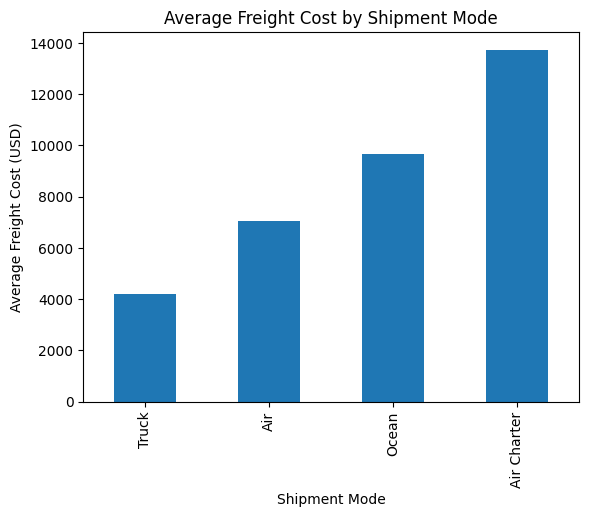

In [68]:
# Chart - 4 visualization code
#average freight cost by shipment mode
df[df['Shipment Mode'] != 'no_value'].groupby('Shipment Mode')['Freight_Cost_USD_Clean'].mean().sort_values().plot(kind='bar', title='Average Freight Cost by Shipment Mode')
plt.xlabel('Shipment Mode')
plt.ylabel('Average Freight Cost (USD)')
plt.show()


In [69]:
#freight cost distribution by shipment mode
fig = px.box(df[df['Shipment Mode']!='no_value'], x='Shipment Mode', y='Freight_Cost_USD_Clean', title='Freight Cost Distribution by Shipment Mode')
fig.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [51]:
# Chart - 5 visualization code
# Chart - 6 visualization code
# Create a dashboard for univariate analysis
fig_uni = make_subplots(
    rows=1, cols=3,
    subplot_titles=( 'On-Time vs Delayed Shipments', 'Managed By Teams Distribution', 'INCO Terms Distribution'),
    specs=[[{'type': 'pie'}, {'type': 'bar'}, {'type': 'pie'}]]
)



# 1. On-Time vs Delayed Distribution
on_time_counts = df['On_Time'].value_counts()
fig_uni.add_trace(
    go.Pie(labels=['On-Time', 'Delayed'], values=on_time_counts.values,
           marker_colors=['#00CC96', '#EF553B'], hole=0.4, name='Delivery Status'),
    row=1, col=1
)



# 2. Managed By Teams Distribution
managed_counts = df['Managed By'].value_counts().head(10)
fig_uni.add_trace(
    go.Bar(x=managed_counts.index, y=managed_counts.values,
           marker_color='gold', name='Teams'),
    row=1, col=2
)


# 3. INCO Terms Distribution
incoterm_counts = df['Vendor INCO Term'].value_counts().head(8)
fig_uni.add_trace(
    go.Pie(labels=incoterm_counts.index, values=incoterm_counts.values,
           marker_colors=px.colors.qualitative.Pastel, name='INCO Terms'),
    row=1, col=3
)

fig_uni.update_layout(height=400, width=1500, title_text="Univariate Analysis Dashboard", showlegend=False)
fig_uni.show()

# Majority of the deliveries are delivered early or on-time
# Almost all of the deliveries are managed by PMO-US team
# Three major vendor inco terms are SCMS from Regional Distribution Center(RDC), EXW(Ex Works) and DDP(Delivery Duty Paid)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [52]:
delay_counts = df['Delay_Category'].value_counts()

fig_delay = go.Figure()

fig_delay.add_pie(
    labels=delay_counts.index,
    values=delay_counts.values,
    hole=0.4
)

fig_delay.update_layout(
    title="Delay Severity Distribution",
    template="plotly_white"
)

fig_delay.show()

# This pie chart shows the distribution of delay severity categories.


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [53]:
# Team vs On-Time Delivery
fig1 = make_subplots(
    rows=1, cols=2,
    subplot_titles=('On-Time Delivery Rate: PMO - US', 'Average Delay Days: PMO - US'),
    specs=[[{'type': 'bar'}, {'type': 'bar'}]]
)

# Calculate metrics
team_performance = df[df['Managed By'] == 'PMO - US'].groupby('Managed By').agg({
    'On_Time': 'mean',
    'delivery_delay_days': 'mean',
    'ID': 'count'
}).rename(columns={'ID': 'Shipment_Count'}).sort_values('On_Time', ascending=False)

# Subplot 1: On-Time Rate
fig1.add_trace(
    go.Bar(x=team_performance.index, y=team_performance['On_Time']*100,
           marker_color='#00CC96',
           text=[f'{x:.1f}%' for x in team_performance['On_Time']*100],
           textposition='auto',
           name='On-Time Rate'),
    row=1, col=1
)

# Subplot 2: Average Delay
fig1.add_trace(
    go.Bar(x=team_performance.index, y=team_performance['delivery_delay_days'],
           marker_color= '#00CC96',
           text=[f'{x:.1f} days' for x in team_performance['delivery_delay_days']],
           textposition='auto',
           name='Avg Delay'),
    row=1, col=2
)

fig1.update_layout(height=500, title_text="Team Performance Analysis", 
                   xaxis_title="Managed By Team", showlegend=False)
fig1.update_yaxes(title_text="On-Time Rate (%)", row=1, col=1)
fig1.update_yaxes(title_text="Average Delay (Days)", row=1, col=2)
fig1.show()

#PMO-US has an on-time rate of 88.5% and average delivery delay of -6 days (deliveries are made 6 days ahead of scheduled delivery date)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [54]:
# Chart - 8 visualization code
import plotly.graph_objects as go

# Filter valid shipment modes
shipment_df = df[df['Shipment Mode'] != 'no_value']

# Compute on-time rate and shipment count
mode_performance = (
    shipment_df
    .groupby('Shipment Mode')
    .agg(
        on_time_rate=('On_Time', 'mean'),
        count=('ID', 'count')
    )
    .reset_index()
)

# Convert to percentage
mode_performance['on_time_rate'] *= 100

# Sort by on-time performance
mode_performance = mode_performance.sort_values(
    by='on_time_rate',
    ascending=False
)

# Plot
fig = go.Figure()

fig.add_trace(
    go.Bar(
        x=mode_performance['Shipment Mode'],
        y=mode_performance['on_time_rate'],
        text=mode_performance['on_time_rate'].round(2).astype(str) + '%',
        textposition='outside'
    )
)

fig.update_layout(
    title='On-Time Delivery Rate by Shipment Mode',
    xaxis_title='Shipment Mode',
    yaxis_title='On-Time Rate (%)',
    template='plotly_white',
    height=450,
    width=800
)

fig.show()

# All of the shipment mode have high on-time rates which indicates shipment mode does not significantly affect the on-time delivery of supplies


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

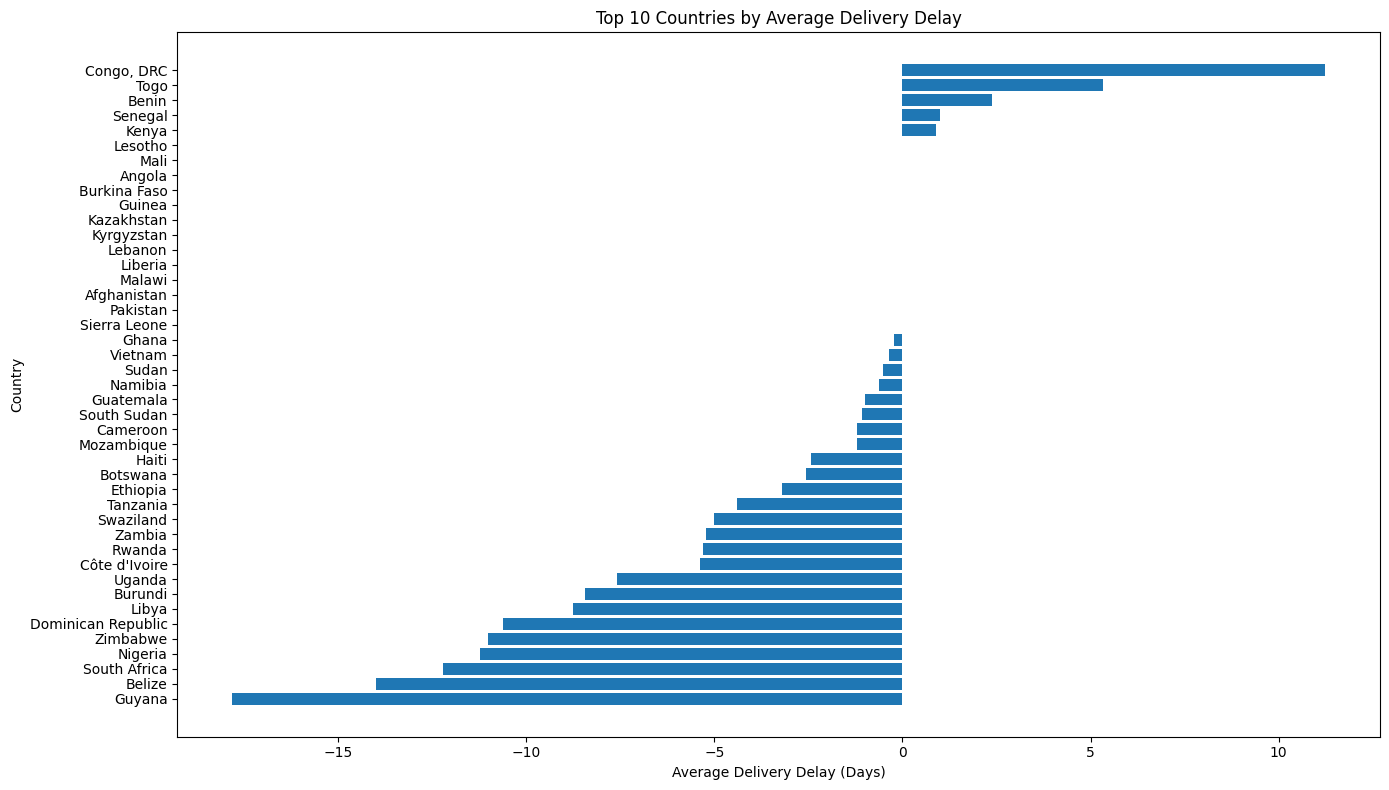

In [55]:
country_delays = (
    df
    .groupby('Country')['delivery_delay_days']
    .mean()
    .sort_values()
    .head(50)
)

plt.figure(figsize=(14, 8))
plt.barh(country_delays.index, country_delays.values)
plt.title('Top 10 Countries by Average Delivery Delay')
plt.xlabel('Average Delivery Delay (Days)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

#insights from country-wise delivery delay analysis
# The analysis reveals significant variation in average delivery delays across countries, indicating that certain regions consistently experience longer delays.
# Countries with the shortest average delivery delays may have more efficient logistics and supply chain operations, while those with longer delays could benefit from targeted improvements.
# Seasonal trends suggest that certain months may be associated with higher delays, possibly due to increased shipping volumes or external factors affecting transportation.


In [56]:
country_perf = (
    df.groupby('Country')
    .agg(on_time=('On_Time', 'mean'), shipments=('ID', 'count'))
    .sort_values('shipments', ascending=False)
    .nsmallest(10, 'on_time')
)
country_perf = country_perf.sort_values('on_time', ascending=False)
fig_country = go.Figure()

fig_country.add_bar(
    x=country_perf.index,
    y=country_perf['on_time'] * 100,
    marker_color=['green' if x >= 0.6 else 'red' for x in country_perf['on_time']]
)

fig_country.update_layout(
    title="Countries with lowest on-time deliveries",
    yaxis_title="On-Time %",
    template="plotly_white"
)

fig_country.show()


In [57]:
# Chart - 9 visualization code
# Country-wise Delivery Performance
country_stats = df.groupby('Country').agg({
    'On_Time': 'mean',
    'delivery_delay_days': ['mean', 'median', 'count'],
    'Line Item Value': 'sum'
}).round(2)
country_stats.columns = ['_'.join(col).strip() for col in country_stats.columns.values]
country_stats = country_stats.sort_values('On_Time_mean', ascending=False)

# Create interactive heatmap-like visualization
fig3 = go.Figure(data=go.Table(
    header=dict(values=['Country', 'On-Time Rate', 'Avg Delay (Days)', 
                        'Median Delay', 'Shipment Count', 'Total Value (USD)'],
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[country_stats.index,
                      [f"{x*100:.1f}%" for x in country_stats['On_Time_mean']],
                      country_stats['delivery_delay_days_mean'],
                      country_stats['delivery_delay_days_median'],
                      country_stats['delivery_delay_days_count'],
                      [f"${x:,.0f}" for x in country_stats['Line Item Value_sum']]],
               fill_color=['lavender' if i % 2 == 0 else 'white' for i in range(len(country_stats))],
               align='left'))
)

fig3.update_layout(height=600, title_text="Country-Wise Delivery Performance Dashboard")
fig3.show()

# Geographic heatmap of delays
fig3b = px.choropleth(country_stats.reset_index(),
                     locations='Country',
                     locationmode='country names',
                     color='delivery_delay_days_mean',
                     hover_name='Country',
                     hover_data=['On_Time_mean', 'delivery_delay_days_count'],
                     color_continuous_scale='Reds',
                     title='Average Delivery Delay by Country (Heatmap)')
fig3b.show()
# we can observe drc-congo experienced higher delivery delay than other countries

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [58]:
# Chart - 10 visualization code
#visualizations for shipment mode efficiency
# Shipment mode efficiency
shipment_efficiency = df.groupby('Shipment Mode').agg({
    'delivery_delay_days': ['mean', 'std'],
    'Line Item Insurance (USD)': 'mean'
})
shipment_efficiency

#remove no_value from shipment mode
shipment_efficiency = shipment_efficiency[shipment_efficiency.index != 'no_value']
shipment_efficiency
fig = make_subplots(rows=2, cols=1, subplot_titles=(
    "Average Delivery Delay (Days) by Shipment Mode",
    "Average Line Item Insurance (USD) by Shipment Mode"
))
for i, mode in enumerate(shipment_efficiency.index):    
    fig.add_trace(
        go.Bar(x=[mode], y=[shipment_efficiency.loc[mode, ('delivery_delay_days', 'mean')]], name=mode),
        row=1, col=1
    )
    fig.add_trace(
        go.Bar(x=[mode], y=[shipment_efficiency.loc[mode, ('Line Item Insurance (USD)', 'mean')]], name=mode),
        row=2, col=1
    )
fig.update_layout(height=600, width=800, title_text="Shipment Mode Efficiency")
fig.show()

#we see that ocean shipment can experience the highest average delivery delay and highest average line item insurance
#this might be due to the complication in shipment by ocean, line item value and chances of loss during delivery
# air charter also has high line item insurance which might be due to its line item value


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

<Axes: xlabel='Lead_Time_Days', ylabel='delivery_delay_days'>

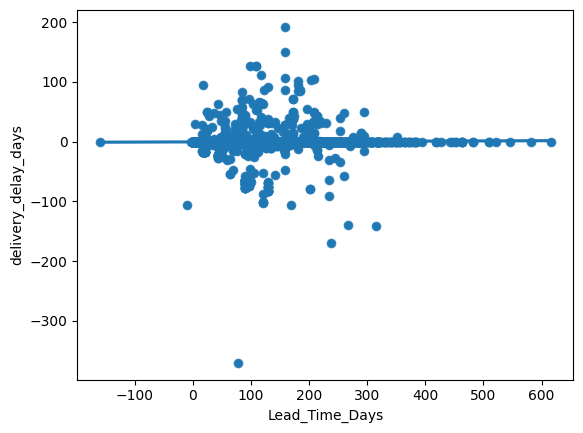

In [59]:
# Chart - 11 visualization code
# Scatter plot: Lead_Time_Days vs. Delay_Days (Seaborn + regression line)
sns.scatterplot(x='Lead_Time_Days', y='delivery_delay_days', data=df)
sns.regplot(x='Lead_Time_Days', y='delivery_delay_days', data=df)

#insights from scatter plot analysis
# The scatter plot provides a visual representation of the relationship between lead time and delivery delay, highlighting the data points and the regression line.
# No strong correlation between lead time and delay days.
# The data points indicate that some shipments may experience longer delays due to longer lead times.
# Delays occurred across various lead times.
# The scatter plot also allows for further exploration of the data, such as identifying potential outliers or patterns in the data.

##### 1. Why did you pick the specific chart?

Scatter plot gives the distribution between two numerical variables and helps us to analyse the relationship between them.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [60]:
# Chart - 12 visualization code
import plotly.graph_objects as go

# Calculate INCO term performance
incoterm_perf = df[df['Vendor INCO Term'].isin(['DDP', 'EXW', 'N/A - From RDC'])].groupby('Vendor INCO Term').agg({
    'On_Time': 'mean',
    'delivery_delay_days': 'mean',
    'Freight_Cost_USD_Clean': 'mean',
    'ID': 'count'
}).sort_values('On_Time', ascending=False)

# Bar chart: Performance by INCO Term
fig_incoterm_perf = go.Figure()

fig_incoterm_perf.add_trace(
    go.Bar(
        x=incoterm_perf.index,
        y=incoterm_perf['On_Time'] * 100,
        name='On-Time Rate (%)',
        marker_color='lightblue'
    )
)

fig_incoterm_perf.add_trace(
    go.Bar(
        x=incoterm_perf.index,
        y=incoterm_perf['delivery_delay_days'],
        name='Avg Delay (Days)',
        marker_color='salmon'
    )
)

fig_incoterm_perf.update_layout(
    title="Performance by INCO Term",
    xaxis_title="INCO Term",
    yaxis_title="Value",
    barmode='group',
    height=600,
    width=900
)

fig_incoterm_perf.show()



In [61]:
inco_df = df[
    (df['Shipment Mode'] != 'no_value') &
    (df['Vendor INCO Term'].isin(['DDP', 'EXW', 'N/A - From RDC']))
]
inco_df['Vendor INCO Term'].replace('N/A - From RDC', 'RDC', inplace=True)

# Aggregate counts
inco_perf = (
    inco_df
    .groupby(['Shipment Mode', 'Vendor INCO Term', 'On_Time_Delivery'])
    .size()
    .reset_index(name='count')
)

fig = px.bar(
    inco_perf,
    x='Vendor INCO Term',
    y='count',
    color='On_Time_Delivery',
    facet_col='Shipment Mode',
    barmode='stack',
    title='INCO Terms vs Delivery Performance',
    color_discrete_map={
        True: '#2ca02c',   # green = on time
        False: '#d62728'   # red = delayed
    }
)

fig.update_layout(
    template='plotly_white',
    height=450,
    width=1100
)

fig.show()
# this plot shows that most supplies are delivered on-time and vendor inco terms and shipment mode do not significantly affect the on-time deliveries 

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

Text(0.5, 1.0, 'Correlation between weight and insurance')

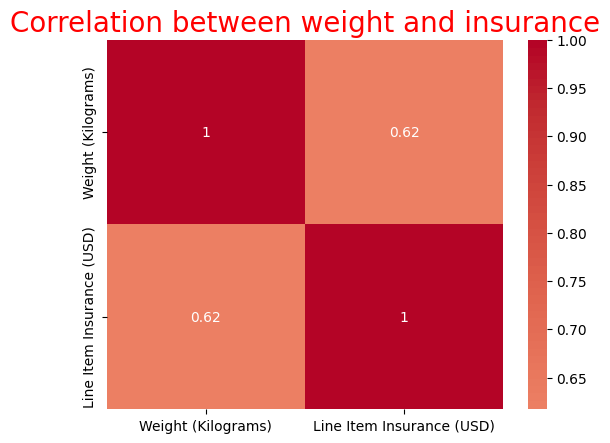

In [62]:
# Chart - 13 visualization code
heat_cols = ['Weight (Kilograms)', 'Line Item Insurance (USD)']
sns.heatmap(df[heat_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between weight and insurance', fontsize=20, color='red', loc='center')


In [63]:
corr_df = (
    df[['Shipment Mode', 'Weight (Kilograms)', 'Line Item Insurance (USD)']]
    .dropna()
    .groupby('Shipment Mode')
    .apply(lambda x: x[['Weight (Kilograms)', 
                        'Line Item Insurance (USD)']].corr().iloc[0,1])
)

corr_df = corr_df.reset_index()
corr_df.columns = ['Shipment Mode', 'Correlation']


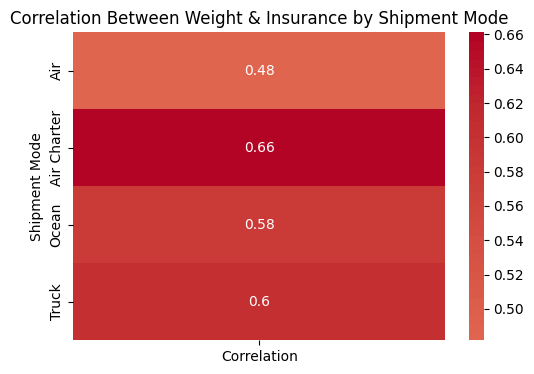

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(
    corr_df.set_index('Shipment Mode'),
    annot=True,
    cmap='coolwarm',
    center=0
)

plt.title("Correlation Between Weight & Insurance by Shipment Mode")
plt.show()


In [65]:
#fill missing values in 'Shipment Mode' column with 'no_value'
df['Shipment Mode'].fillna('no_value', inplace=True)
fig = px.scatter(
    df[df['Shipment Mode'] != 'no_value'],
    x='Weight (Kilograms)',
    y='Line Item Insurance (USD)',
    facet_col='Shipment Mode',
    facet_col_wrap=2,   # 👈 forces 2 columns → 2x2
    log_x=True,
    log_y=True,
    opacity=0.6,
    title='Insurance Cost vs Weight by Shipment Mode',
    trendline='ols'
)

fig.update_layout(
    template='plotly_white',
    height=900  
)

# Optional: clean up facet labels
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))

fig.show()




##### 1. Why did you pick the specific chart?

- Heatmap gives the correlation between two numerical variables
- I chose Scatter plot as it gives the distribution and trend of two numerical variables across all shipment modes

##### 2. What is/are the insight(s) found from the chart?

- From the heatmap we can deduce that weight and insurance are moderately correlated indicating that factors other than weight influence the insurance cost of line item.
- The relationship between weight and insurance cost varies significantly across different shipment modes, indicating that mode selection impacts cost structures.
- Some modes, such as 'Air Freight', show a stronger positive correlation between weight and insurance cost, while others like 'Sea Freight' exhibit a more moderate relationship.
- The presence of trendlines in each facet helps visualize these differences, suggesting that shipment mode should be a key consideration when estimating insurance costs based on weight.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart - 14 - Correlation Heatmap

<Axes: >

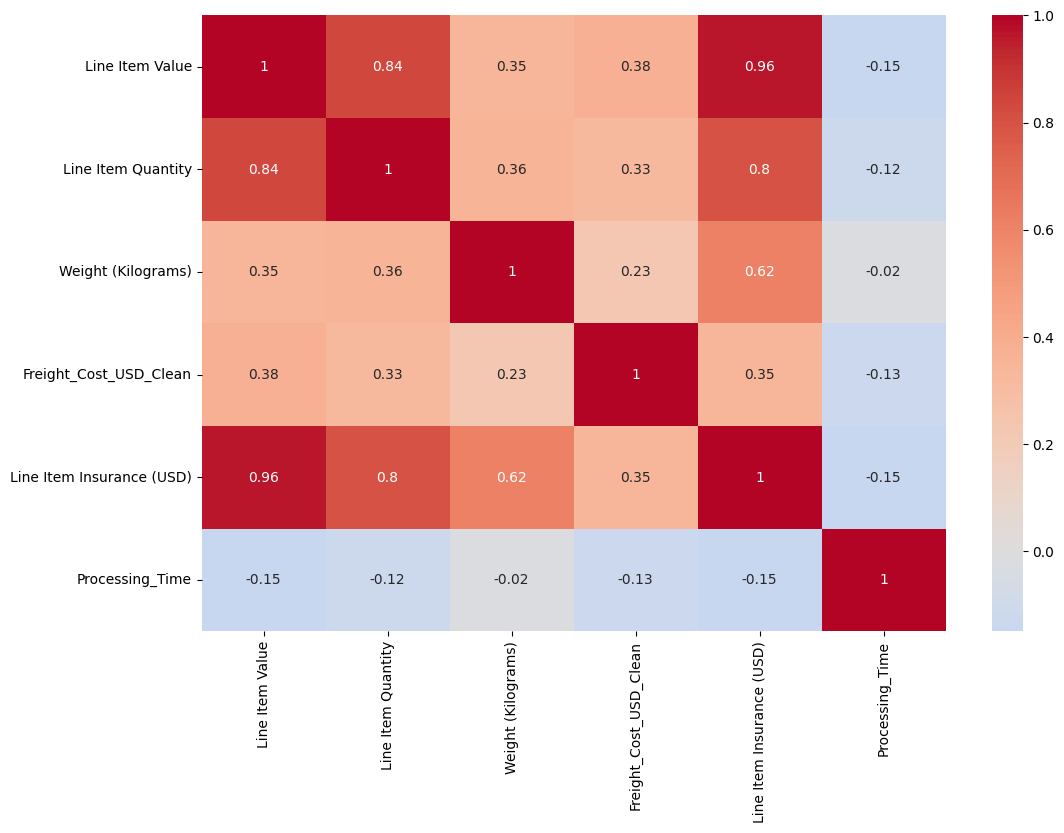

In [66]:
# Correlation Heatmap visualization code
# Correlation matrix
correlation_matrix = df[numeric_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

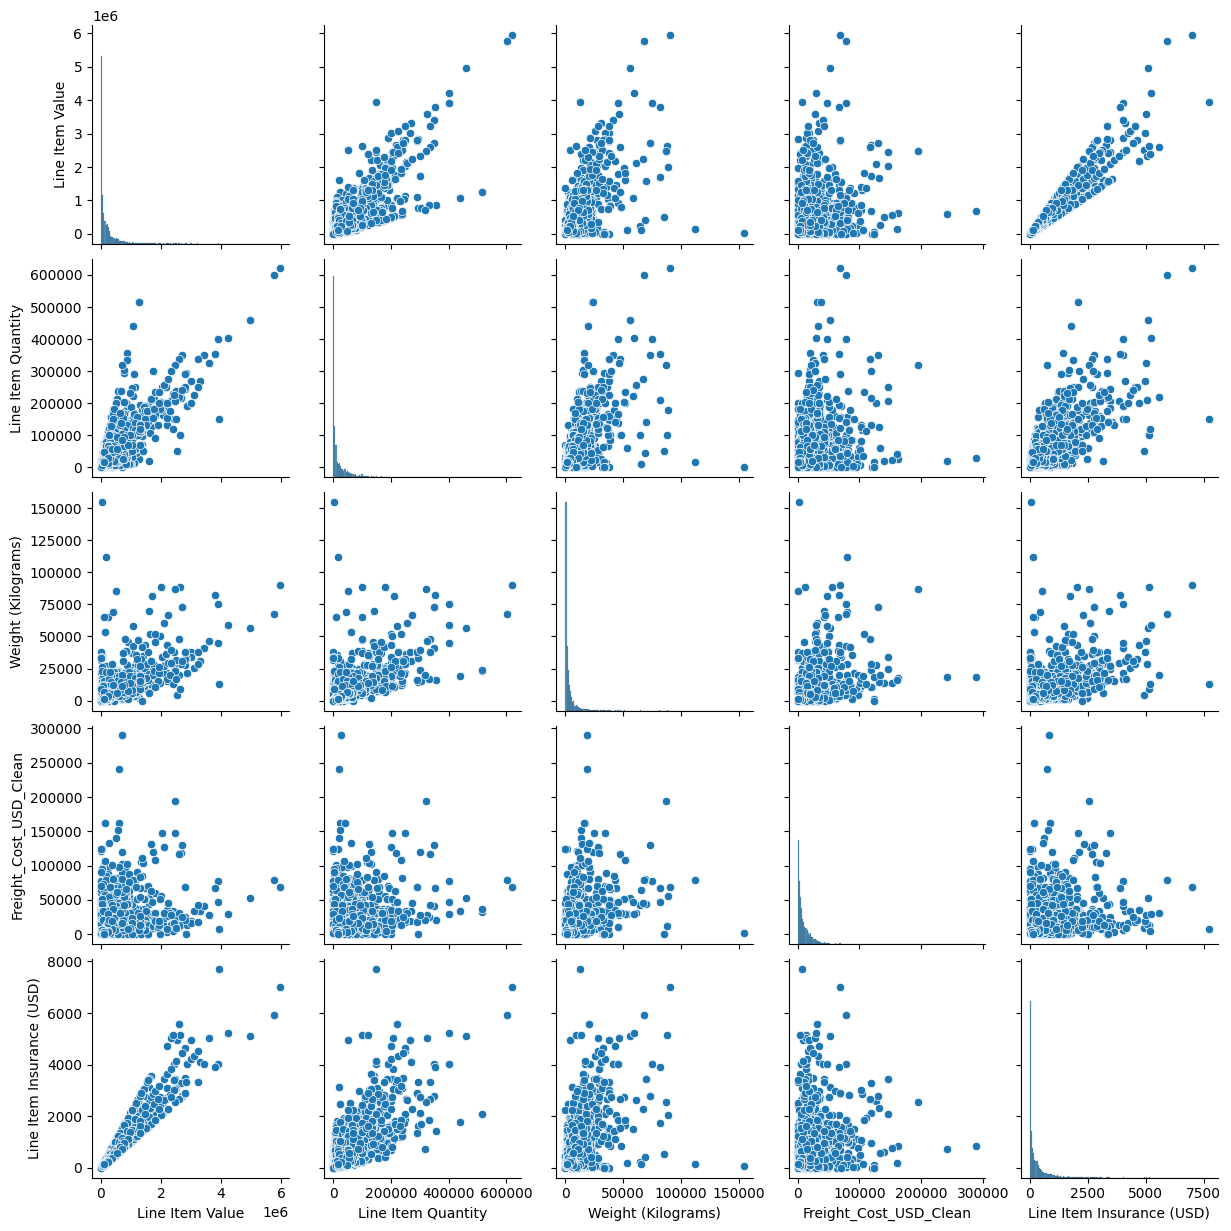

In [67]:
# Pair plots for key variables
key_vars = ['Line Item Value', 'Line Item Quantity', 'Weight (Kilograms)', 
            'Freight_Cost_USD_Clean', 'Line Item Insurance (USD)',]
sns.pairplot(df[key_vars].dropna())

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
- Use air and air charter shipment modes to deliver only low weight and time critical supplies
- Use ocean shipment mode to deliver supplies which are not time critical
- Keep more lead time to deliver to remote areas to ensure on-time deliveries
- Avoid air charter shipments to decrease insurance costs
- The on time rate of deliveries from Regional distribution is low. Hence, negotiate terms with RDCs to increase on-time delivery rate

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***